In [1]:
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json


In [2]:
url = 'https://covidtracking.com/api/v1/states/daily.json'

r = requests.get(url)

json_data = r.json()

df = pd.json_normalize(json_data)
df['DperP'] = df['death']/df['positive']
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

#df.head()

In [3]:
UT = df[df['state']=='UT']

UT.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,DperP
48,2020-04-18,UT,2931.0,57013.0,NaN,NaN,251.0,NaN,NaN,NaN,...,59944.0,59944.0,59944.0,49,2.0,7.0,4047.0,126.0,4173.0,0.008530
104,2020-04-17,UT,2805.0,52966.0,NaN,NaN,244.0,NaN,NaN,NaN,...,55771.0,55771.0,55771.0,49,2.0,6.0,5971.0,122.0,6093.0,0.008200
160,2020-04-16,UT,2683.0,46995.0,NaN,NaN,238.0,NaN,NaN,NaN,...,49678.0,49678.0,49678.0,49,1.0,17.0,1923.0,141.0,2064.0,0.007827
216,2020-04-15,UT,2542.0,45072.0,NaN,NaN,221.0,NaN,NaN,NaN,...,47614.0,47614.0,47614.0,49,1.0,8.0,1008.0,130.0,1138.0,0.007868
272,2020-04-14,UT,2412.0,44064.0,NaN,NaN,213.0,NaN,NaN,NaN,...,46476.0,46476.0,46476.0,49,1.0,12.0,640.0,49.0,689.0,0.007877


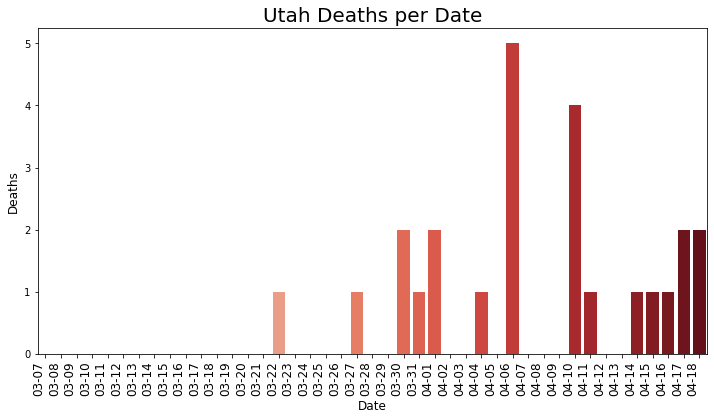

In [4]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'deathIncrease', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Deaths per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Deaths', fontdict={'fontsize':12})

plt.savefig('Utah Deaths per Date.png')

plt.show()



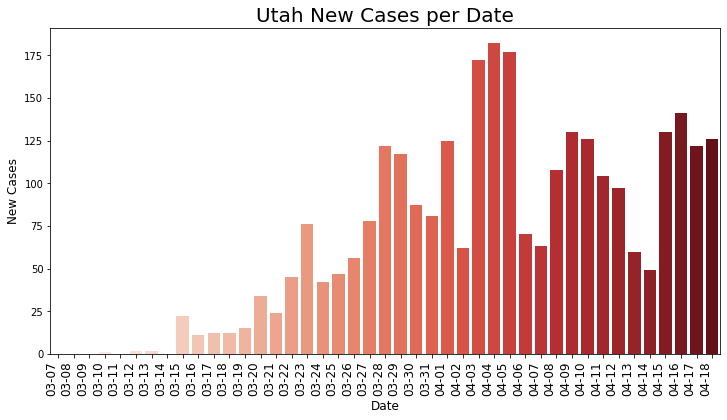

In [5]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positiveIncrease', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah New Cases per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('New Cases', fontdict={'fontsize':12})

plt.savefig('Utah New Cases per Date.png')
plt.show()

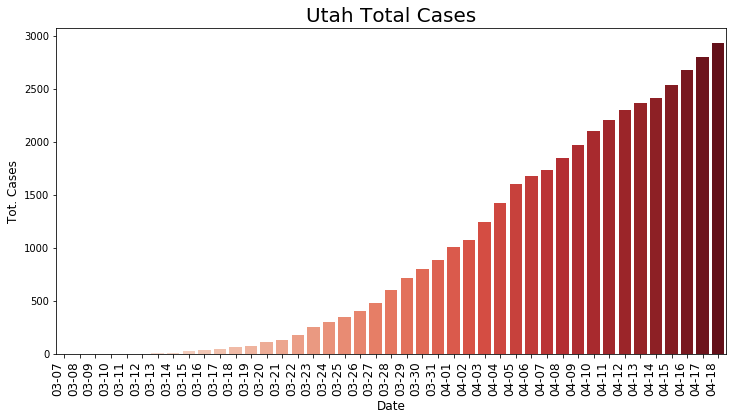

In [6]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positive', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Total Cases', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

plt.savefig('Utah Total Cases.png')
plt.show()

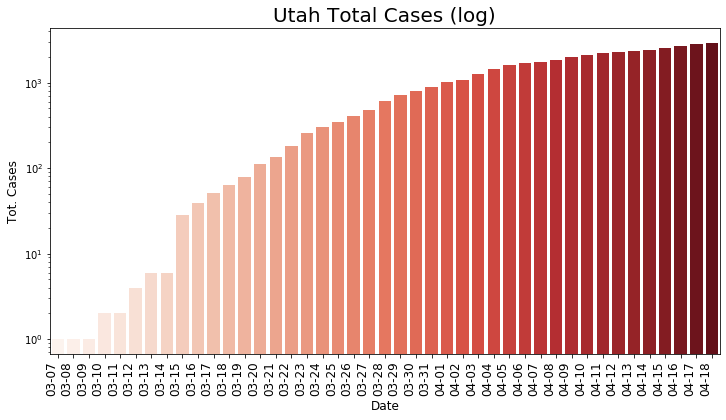

In [7]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positive', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Total Cases (log)', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})
ax.set( yscale='log')

plt.savefig('Utah Total Cases (log).png')
plt.show()

In [8]:
NY = df[df['state']=='NY']

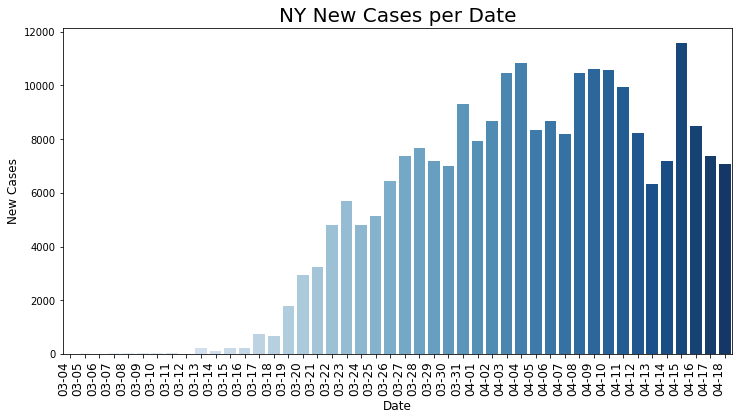

In [9]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positiveIncrease', data = NY, palette = 'Blues')

x_dates = NY['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('NY New Cases per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('New Cases', fontdict={'fontsize':12})

plt.savefig('NY New Cases per Date.png')
plt.show()

In [10]:
combine = UT.append(NY)

combine.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,DperP
48,2020-04-18,UT,2931.0,57013.0,NaN,NaN,251.0,NaN,NaN,NaN,...,59944.0,59944.0,59944.0,49,2.0,7.0,4047.0,126.0,4173.0,0.008530
104,2020-04-17,UT,2805.0,52966.0,NaN,NaN,244.0,NaN,NaN,NaN,...,55771.0,55771.0,55771.0,49,2.0,6.0,5971.0,122.0,6093.0,0.008200
160,2020-04-16,UT,2683.0,46995.0,NaN,NaN,238.0,NaN,NaN,NaN,...,49678.0,49678.0,49678.0,49,1.0,17.0,1923.0,141.0,2064.0,0.007827
216,2020-04-15,UT,2542.0,45072.0,NaN,NaN,221.0,NaN,NaN,NaN,...,47614.0,47614.0,47614.0,49,1.0,8.0,1008.0,130.0,1138.0,0.007868
272,2020-04-14,UT,2412.0,44064.0,NaN,NaN,213.0,NaN,NaN,NaN,...,46476.0,46476.0,46476.0,49,1.0,12.0,640.0,49.0,689.0,0.007877


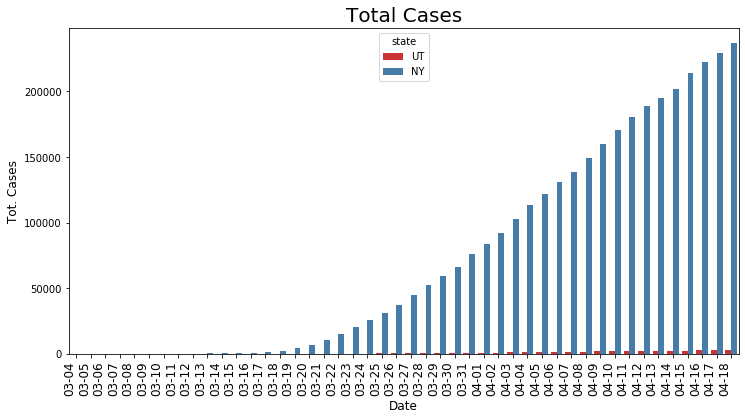

In [11]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positive',hue='state', data = combine, palette = 'Set1')

x_dates = combine['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Total Cases', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

plt.savefig('UT_NY Total Cases.png')
plt.show()

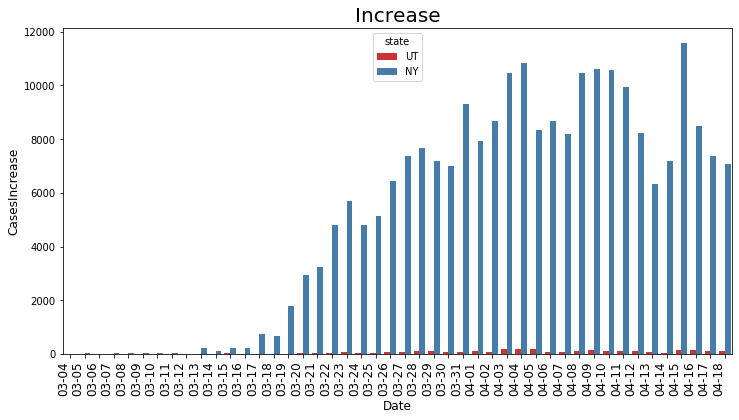

In [12]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positiveIncrease',hue='state', data = combine, palette = 'Set1')

x_dates = combine['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Increase', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('CasesIncrease', fontdict={'fontsize':12})

plt.savefig('UT_NY Daily Increase Cases.png')
plt.show()

In [13]:
ID = df[df['state']=='ID']
NM = df[df['state']=='NM']
CO = df[df['state']=='CO']
AZ = df[df['state']=='AZ']

In [14]:
FourC = UT.append(ID).append(CO).append(AZ).append(NM).append(df[df['state']=='NV']).append(df[df['state']=='WY'])

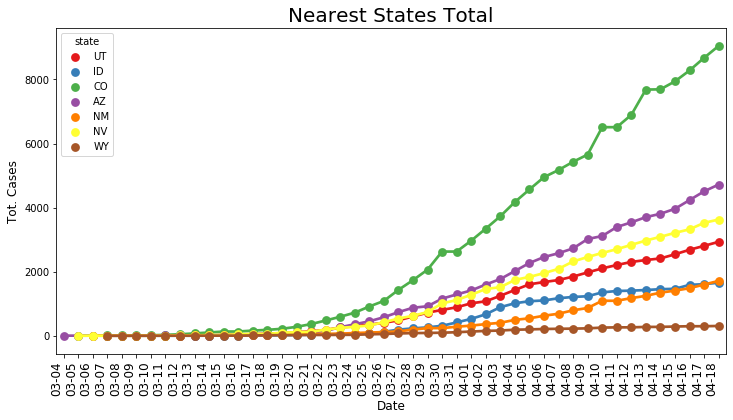

In [15]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive',hue='state', data = FourC, palette = 'Set1')

x_dates = combine['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Nearest States Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

plt.savefig('Four Corners Total Cases.png')
plt.show()

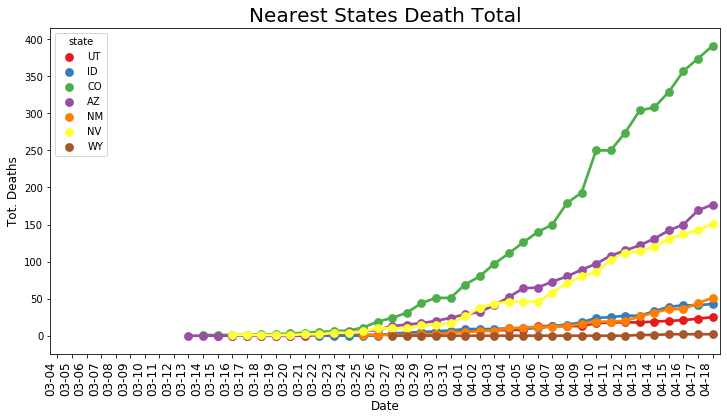

In [16]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'death',hue='state', data = FourC, palette = 'Set1')

x_dates = combine['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Nearest States Death Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Deaths', fontdict={'fontsize':12})

plt.savefig('4C Daily Death Total.png')
plt.show()

In [17]:
simCase = UT.append(df[df['state']=='KY']).append(df[df['state']=='NV']).append(df[df['state']=='OK'])

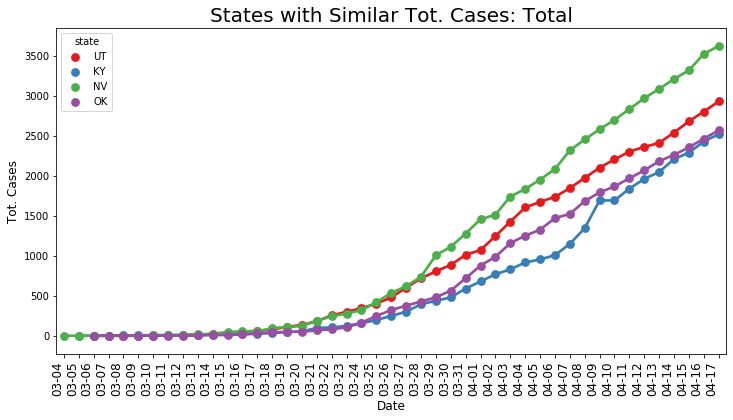

In [18]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive',hue='state', data = simCase, palette = 'Set1')

x_dates = combine['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

plt.savefig('Similar Cases Totals.png')
plt.show()

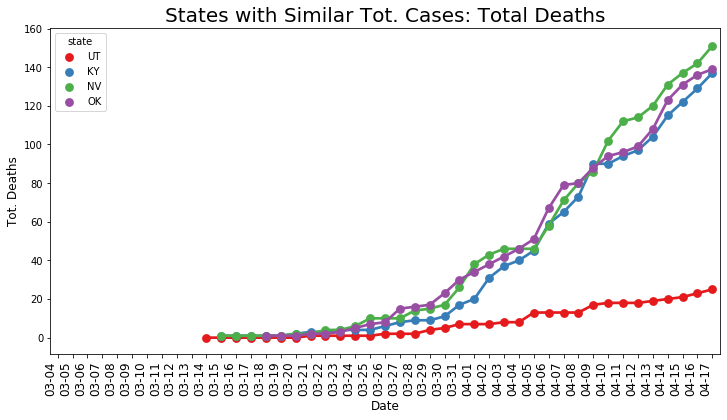

In [19]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'death',hue='state', data = simCase, palette = 'Set1')

x_dates = combine['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Total Deaths', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Deaths', fontdict={'fontsize':12})

plt.savefig('Similar Cases Death.png')
plt.show()

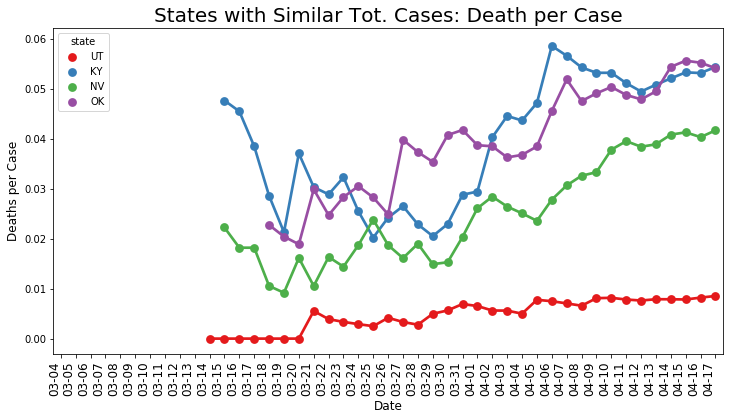

In [20]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'DperP',hue='state', data = simCase, palette = 'Set1')

x_dates = combine['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Death per Case', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Deaths per Case', fontdict={'fontsize':12})

plt.savefig('Similar Cases tot. Deaths per Case.png')
plt.show()

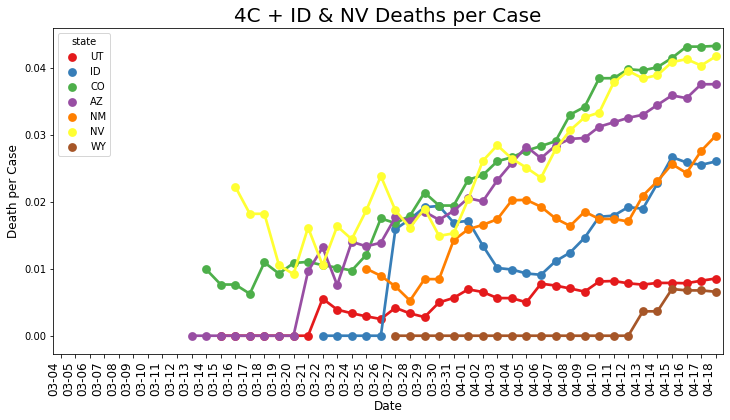

In [21]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'DperP',hue='state', data = FourC, palette = 'Set1')

x_dates = combine['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('4C + ID & NV Deaths per Case', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Death per Case', fontdict={'fontsize':12})

plt.savefig('4C + ID & NV Deaths per Case.png')
plt.show()